<a href="https://colab.research.google.com/github/jaehyuk/Statoil_C-CORE_Iceberg_Classification/blob/master/statoil_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data preprocessing : https://www.kaggle.com/muonneutrino/exploration-transforming-images-in-python

keras CNN: https://www.kaggle.com/devm2024/keras-model-for-beginners-0-210-on-lb-eda-r-d

HIstory: https://www.kaggle.com/cbryant/keras-cnn-statoil-iceberg-lb-0-1995-now-0-1516

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hohobrothers","key":"2c60c5affdffcdb12d3474eebf961abf"}'}

In [0]:
# Next, install kaggle API client
#!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

# Kaggle dataset download
# copy from Kaggle dataset website

In [3]:
!kaggle competitions download -c statoil-iceberg-classifier-challenge

  0% 0.00/37.7k [00:00<?, ?B/s]
100% 37.7k/37.7k [00:00<00:00, 30.9MB/s]
 77% 33.0M/42.9M [00:01<00:00, 17.8MB/s]
100% 42.9M/42.9M [00:01<00:00, 36.9MB/s]
 97% 237M/245M [00:05<00:00, 46.9MB/s]
100% 245M/245M [00:06<00:00, 41.3MB/s]


In [4]:
!7z x train.json.7z
!7z x test.json.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 44932785 bytes (43 MiB)

Extracting archive: train.json.7z
--
Path = train.json.7z
Type = 7z
Physical Size = 44932785
Headers Size = 154
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      6% - data/processed/train.json                                 12% - data/processed/train.json                                 19% - data/processed/train.json                                 27% - data/processed/train.json                                 35% - data/processe

In [0]:
#pip install pyunpack
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [0]:
train = pd.read_json("./data/processed/train.json", encoding='utf8')
test = pd.read_json("./data/processed/test.json", encoding='utf8')

# New Section

In [0]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# #plt.rcParams['figure, figsize'] = 12, 8
# %matplotlib inline

# # Take a look at a iceberg
# import plotly.offline as py
# import plotly.graph_objs as go
# from plotly import tools

# py.init_notebook_mode(connected=True) # plotly를 jupyter notebook에 사용

# # tqdm
# #from tqdm import tqdm_notebook, tnrange

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# #local_zip = '/tmp/train.json.7z'
# #Archive(local_zip).extractall('/tmp')


# # zip_ref = zipfile.ZipFile(local_zip, 'r')
# # zip_ref.extractall('/tmp')
# # zip_ref.close()

# base_dir = '/content/'
# train_dir = os.path.join(base_dir, 'train.json')
# test_dir = os.path.join(base_dir, 'test.json')

In [0]:
# train = pd.read_json('./input/data/processed/train.json')
# print('train data done!')


http://deliverableinsights.com/index.php/2018/02/04/iceberg-challenge/

https://github.com/bmowry06/IcebergChallenge

###  What is log loss?
### Introduction
Log Loss is the most important classification metric based on probabilities. 

It's hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models.  For any given problem, a lower log-loss value means better predictions.

Log Loss is a slight twist on something called the **Likelihood Function**. In fact, Log Loss is -1 * the log of the likelihood function. So, we will start by understanding the likelihood function.

The likelihood function answers the question "How likely did the model think the actually observed set of outcomes was." If that sounds confusing, an example should help.  

### Example
A model predicts probabilities of `[0.8, 0.4, 0.1]` for three houses.  The first two houses were sold, and the last one was not sold. So the actual outcomes could be represented numeically as `[1, 1, 0]`.

Let's step through these predictions one at a time to iteratively calculate the likelihood function.

The first house sold, and the model said that was 80% likely.  So, the likelihood function after looking at one prediction is 0.8.

The second house sold, and the model said that was 40% likely.  There is a rule of probability that the probability of multiple independent events is the product of their individual probabilities.  So, we get the combined likelihood from the first two predictions by multiplying their associated probabilities.  That is `0.8 * 0.4`, which happens to be 0.32.

Now we get to our third prediction.  That home did not sell.  The model said it was 10% likely to sell.  That means it was 90% likely to not sell.  So, the observed outcome of *not selling* was 90% likely according to the model.  So, we multiply the previous result of 0.32 by 0.9.  

We could step through all of our predictions.  Each time we'd find the probability associated with the outcome that actually occurred, and we'd multiply that by the previous result.  That's the likelihood.

### From Likelihood to Log Loss
Each prediction is between 0 and 1. If you multiply enough numbers in this range, the result gets so small that computers can't keep track of it.  So, as a clever computational trick, we instead keep track of the log of the Likelihood.  This is in a range that's easy to keep track of. We multiply this by negative 1 to maintain a common convention that lower loss scores are better.

https://datawookie.netlify.com/blog/2015/12/making-sense-of-logarithmic-loss/




```
import os
import numpy as np 
import pandas as pd 
from sklearn.metrics import log_loss 
%pylab inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
```


---






In [7]:
train.head()


,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [0]:
band_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_1']])
band_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_2']])

train_all = np.concatenate([band_1[:,:,:,np.newaxis], band_2[:,:,:,np.newaxis], ((band_1 + band_2)/2)[:,:,:, np.newaxis]], axis=-1)

In [0]:
target = train['is_iceberg']

In [0]:
train_cv, train_valid, target_cv, target_valid = train_test_split(train_all, target, random_state=2019, train_size=0.8)

### Building CNN model using Keras. 

In [0]:
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate

from keras.models import Model
from keras import initializers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

In [0]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epochs_end(self, epoch, logs={}):
#         if (logs.get('acc')>0.99):
#             print('stop modeling')
#             self.model.stop_training = True
          
            

In [0]:
def get_callbacks(filepath, patience=2):
    early_stopping = EarlyStopping('val_loss', patience=patience, mode='min')
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [early_stopping, msave]

file_path = '.model_weights.hdf5'
callbacks = get_callbacks(file_path, patience=5) 

In [0]:
#callback = myCallback()

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # 1st layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(75, 75, 3)),
    tf.keras.layers.MaxPooling2D(3,2),
    tf.keras.layers.Dropout(0.2),
    # 2nd layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # 3rd layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # 4th layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

W0613 19:46:33.024450 140052677117824 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

W0613 19:46:40.576839 140052677117824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
history = model.fit(train_cv, target_cv,
                   batch_size=48,
                   epochs=50,
                   verbose=1,
                   validation_data=(train_valid, target_valid),
                   callbacks=callbacks
                   )

Train on 1283 samples, validate on 321 samples
Epoch 1/50
1283/1283 [==============================] - 1s 655us/sample - loss: 0.2166 - acc: 0.9111 - val_loss: 0.2916 - val_acc: 0.9003
Epoch 2/50
1283/1283 [==============================] - 1s 543us/sample - loss: 0.2639 - acc: 0.9010 - val_loss: 0.2547 - val_acc: 0.8941
Epoch 3/50
1283/1283 [==============================] - 1s 494us/sample - loss: 0.2011 - acc: 0.9150 - val_loss: 0.3221 - val_acc: 0.8847
Epoch 4/50
1283/1283 [==============================] - 1s 479us/sample - loss: 0.1877 - acc: 0.9096 - val_loss: 0.3306 - val_acc: 0.8941
Epoch 5/50
1283/1283 [==============================] - 1s 490us/sample - loss: 0.2332 - acc: 0.8885 - val_loss: 0.2833 - val_acc: 0.8785
Epoch 6/50
1283/1283 [==============================] - 1s 487us/sample - loss: 0.3497 - acc: 0.8831 - val_loss: 0.2891 - val_acc: 0.8910
Epoch 7/50
1283/1283 [==============================] - 1s 491us/sample - loss: 0.2611 - acc: 0.9104 - val_loss: 0.2680 - val

<Figure size 432x288 with 0 Axes>

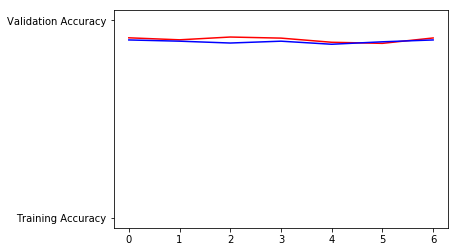

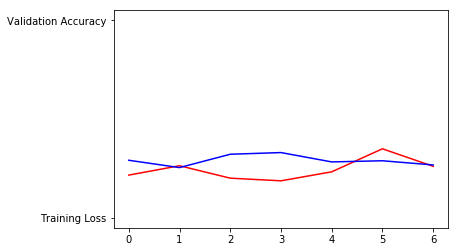

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Accuracy')
plt.figure()

In [0]:
test_band_1 = np.array([np.array(test_band).astype(np.float32).reshape(75,75) for test_band in test['band_1']])
test_band_2 = np.array([np.array(test_band).astype(np.float32).reshape(75,75) for test_band in test['band_2']])

test_all = np.concatenate([test_band_1[:,:,:,np.newaxis], test_band_2[:,:,:,np.newaxis], ((test_band_1 + test_band_2)/2)[:,:,:, np.newaxis]], axis=-1)

In [0]:
# Prediction
predicted_test=model.predict_proba(test_all)

### Submission

In [0]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg']=predicted_test.reshape((predicted_test.shape[0]))
submission.to_csv('2nd_submission', index=False)

In [30]:
predicted_test.shape

(8424, 1)

In [31]:
submission.head(20)

,id,is_iceberg
0,5941774d,0.000046
1,4023181e,0.939750
2,b20200e4,1.000000
3,e7f018bb,0.999999
4,4371c8c3,0.993360
5,a8d9b1fd,0.595027
6,29e7727e,0.003944
7,92a51ffb,1.000000
8,c769ac97,0.000000
9,aee0547d,0.000000
